In [28]:
#Loading the dataset

from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [29]:
#Visualize the dataset numerically

first_image = X_train[0]
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

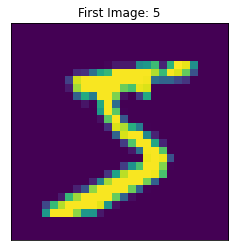

In [30]:
#Visualize the dataset pictorially

from matplotlib import pyplot as plt
first_image = X_train[0]
plt.imshow(X_train[0])
plt.xticks([])
plt.yticks([])
plt.title('First Image: ' + str(y_train[0]))
plt.show()

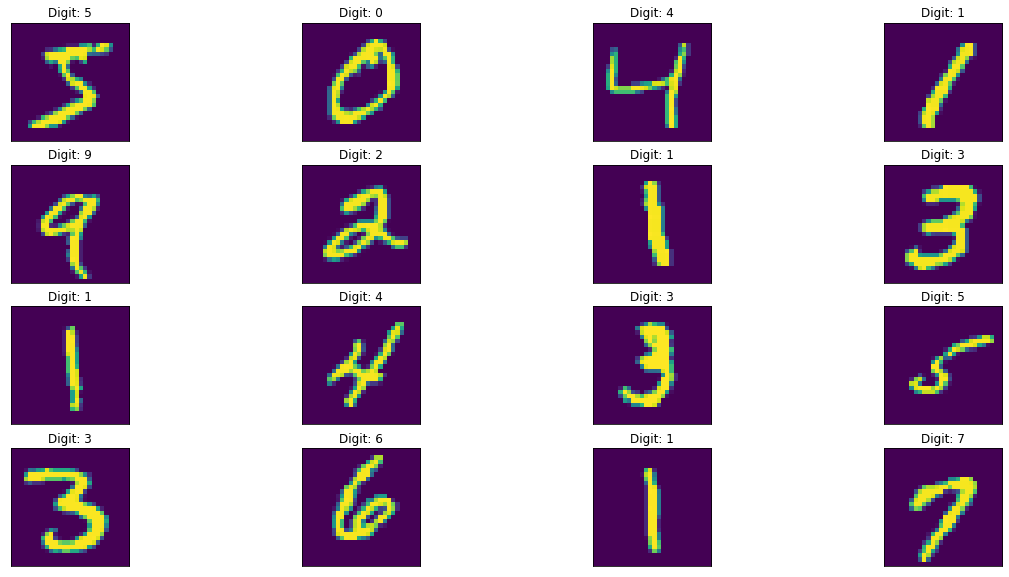

In [31]:
#Visualize more images from the dataset pictorially 

plt.figure(figsize = (20, 10))
for count in range(16):
  plt.subplot(4, 4, count + 1)
  plt.imshow(X_train[count])
  plt.xticks([])
  plt.yticks([])
  plt.title('Digit: ' + str(y_train[count]))
plt.show()

In [32]:
#Normalize the image data

X_train = X_train/255
X_test = X_test/255
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [33]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


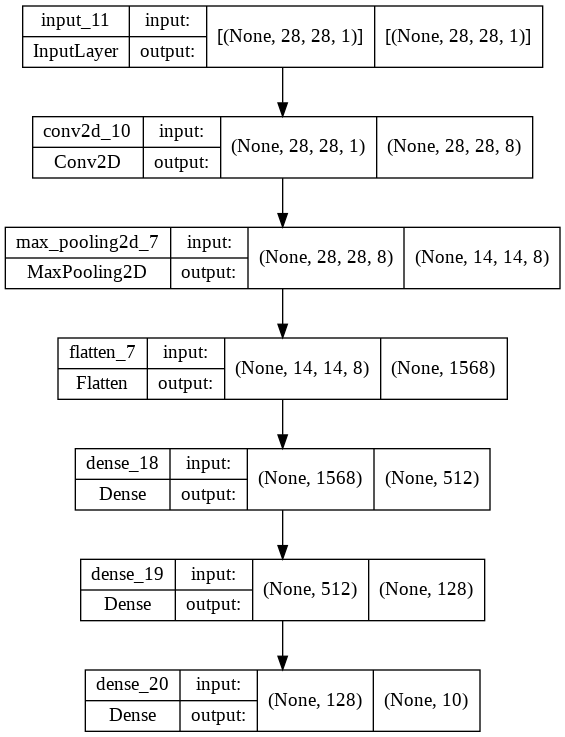

In [34]:
#Creating the first CNN model

from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils.vis_utils import plot_model
import os

input_image = Input(shape = (28, 28, 1))
conv_layer_1 = Conv2D(kernel_size = (3, 3), filters = 8, padding = 'same', activation = 'relu')(input_image)
pool_layer_1 = MaxPooling2D(pool_size = (2, 2))(conv_layer_1)
flatten_layer = Flatten()(pool_layer_1)
dense_layer_1 = Dense(units = 512, activation = 'relu')(flatten_layer)
dense_layer_2 = Dense(units = 128, activation = 'relu')(dense_layer_1)
output_layer = Dense(units = 10, activation = 'softmax')(dense_layer_2)

first_model = Model(inputs = input_image, outputs = output_layer)
first_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics= 'accuracy')
os.chdir('/content/gdrive/MyDrive/Projects/HandwrittenDigitClassification')
plot_model(first_model, show_shapes = True, to_file = 'Model1.png')

In [35]:
#Reshape input data before training
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

In [36]:
#One Hot encode the output values

from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)
print(y_train_one_hot[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [37]:
#Train the Model for 10 epochs

from tensorflow import config
config.run_functions_eagerly(True)
first_model.fit(X_train, y_train_one_hot, epochs = 10, batch_size = 32)

Epoch 1/10
   5/1875 [..............................] - ETA: 51s - loss: 2.1481 - accuracy: 0.3063

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


1875/1875 [==============================] - 50s 26ms/step - loss: 0.1482 - accuracy: 0.9550
Epoch 2/10
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0499 - accuracy: 0.9847
Epoch 3/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0300 - accuracy: 0.9904
Epoch 4/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0220 - accuracy: 0.9929
Epoch 5/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0152 - accuracy: 0.9949
Epoch 6/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0111 - accuracy: 0.9962
Epoch 7/10
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0107 - accuracy: 0.9964
Epoch 8/10
1875/1875 [==============================] - 48s 26ms/step - loss: 0.0074 - accuracy: 0.9975
Epoch 9/10
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0082 - accuracy: 0.9974
Epoch 10/10
1875/1875 [==============================] - 49s 26ms/step - lo

In [39]:
#Test the model's performance on the test data

first_model.evaluate(X_test, y_test_one_hot)

 11/313 [>.............................] - ETA: 3s - loss: 0.0457 - accuracy: 0.9886

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


313/313 [==============================] - 4s 11ms/step - loss: 0.0661 - accuracy: 0.9870


[0.06611379981040955, 0.9869999885559082]

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


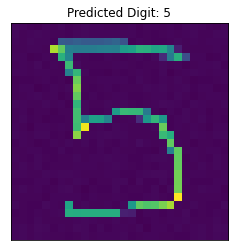

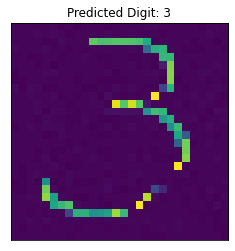

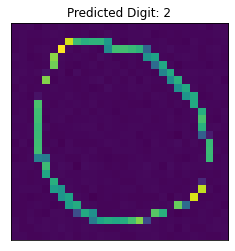

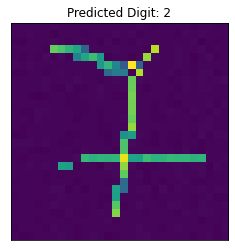

In [49]:
#See if the model is able to predict on custom data

from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
def test_mnist(img_name):
  input_img = load_img(img_name, target_size = (28, 28), color_mode = 'grayscale')
  img_array = img_to_array(input_img)
  img_array = np.expand_dims(img_array, axis = 0)
  result_one_hot = first_model.predict(img_array)
  result = np.argmax(result_one_hot)
  plt.imshow(input_img)
  plt.xticks([])
  plt.yticks([])
  plt.title('Predicted Digit: ' + str(result))
  plt.show()
test_mnist('test1.png')
test_mnist('test2.png')
test_mnist('test3.png')
test_mnist('test4.png')